In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib
import nltk
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import re

Data Cleaning

In [2]:
url = 'https://raw.githubusercontent.com/gadenbuie/mueller-report/master/mueller_report.csv'
data = pd.read_csv(url)
data[:10]

,page,line,text
0,1,1,U.S. Department of Justice
1,1,2,"AttarAe:,c\\'erlc Predtiet // Mtt; CeA1:ttiA"
2,1,3,Ma1:ertalPrn1:eetedUAder Fed. R. Crhtt. P. 6(e)
3,1,4,Report On The Investigation Into
4,1,5,Russian InterferenceIn The
5,1,6,2016 PresidentialElection
6,1,7,Volume I of II
7,1,8,"Special Counsel Robert S. Mueller, III"
8,1,9,Submitted Pursuant to 28 C.F.R. § 600.8(c)
9,1,10,"Washington, D.C."


In [3]:
data['text'] = data['text'].str.replace(',', '')
data['text'] = data['text'].str.replace('.', '')
data['text'] = data['text'].str.replace('"', '')
data['text'] = data['text'].str.replace(';', '')
data['text'] = data['text'].str.replace(':', '')
data[:10]

,page,line,text
0,1,1,US Department of Justice
1,1,2,AttarAec\\'erlc Predtiet // Mtt CeA1ttiA
2,1,3,Ma1ertalPrn1eetedUAder Fed R Crhtt P 6(e)
3,1,4,Report On The Investigation Into
4,1,5,Russian InterferenceIn The
5,1,6,2016 PresidentialElection
6,1,7,Volume I of II
7,1,8,Special Counsel Robert S Mueller III
8,1,9,Submitted Pursuant to 28 CFR § 6008(c)
9,1,10,Washington DC


In [4]:
data["word_count"] = data['text'].apply(lambda x: len(str(x).split(" ")))
data[:10]

,page,line,text,word_count
0,1,1,US Department of Justice,4
1,1,2,AttarAec\\'erlc Predtiet // Mtt CeA1ttiA,5
2,1,3,Ma1ertalPrn1eetedUAder Fed R Crhtt P 6(e),6
3,1,4,Report On The Investigation Into,5
4,1,5,Russian InterferenceIn The,3
5,1,6,2016 PresidentialElection,2
6,1,7,Volume I of II,4
7,1,8,Special Counsel Robert S Mueller III,6
8,1,9,Submitted Pursuant to 28 CFR § 6008(c),7
9,1,10,Washington DC,2


In [5]:
data['word_count'].describe().round(1)

count    19195.0
mean        11.4
std          7.5
min          1.0
25%          5.0
50%         13.0
75%         16.0
max        121.0
Name: word_count, dtype: float64

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Mackdig25/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
sw = stopwords.words('english')
sw[:5]

['i', 'me', 'my', 'myself', 'we']

In [8]:
def stopwords(text):
    '''a function for remoing the stopword'''
    #removing the stop words and lowercasing the selected words
    #text = [str(word)for word in text if type(word) == float]
    text = [word.lower() for word in str(text).split() if word.lower() not in sw]
    #joining the list of words with space seperator
    return ' '.join(text)

In [9]:
data["text"]= data['text'].apply(stopwords)
data[:10]

,page,line,text,word_count
0,1,1,us department justice,4
1,1,2,attaraec\\'erlc predtiet // mtt cea1ttia,5
2,1,3,ma1ertalprn1eeteduader fed r crhtt p 6(e),6
3,1,4,report investigation,5
4,1,5,russian interferencein,3
5,1,6,2016 presidentialelection,2
6,1,7,volume ii,4
7,1,8,special counsel robert mueller iii,6
8,1,9,submitted pursuant 28 cfr § 6008(c),7
9,1,10,washington dc,2


In [10]:
data["new_word_count"] = data['text'].apply(lambda x: len(str(x).split(" ")))
data[:10]

,page,line,text,word_count,new_word_count
0,1,1,us department justice,4,3
1,1,2,attaraec\\'erlc predtiet // mtt cea1ttia,5,5
2,1,3,ma1ertalprn1eeteduader fed r crhtt p 6(e),6,6
3,1,4,report investigation,5,2
4,1,5,russian interferencein,3,2
5,1,6,2016 presidentialelection,2,2
6,1,7,volume ii,4,2
7,1,8,special counsel robert mueller iii,6,5
8,1,9,submitted pursuant 28 cfr § 6008(c),7,6
9,1,10,washington dc,2,2


In [11]:
top_words = data['text'].str.split(expand = True).stack().value_counts()
top_20 = top_words[:20]
top_20

president        1825
302              1666
trump            1410
us                906
campaign          794
russian           752
cohen             722
2016              710
justice           660
investigation     620
russia            613
would             585
flynn             582
office            577
department        570
meeting           563
email             520
mcgahn            509
comey             503
told              492
dtype: int64

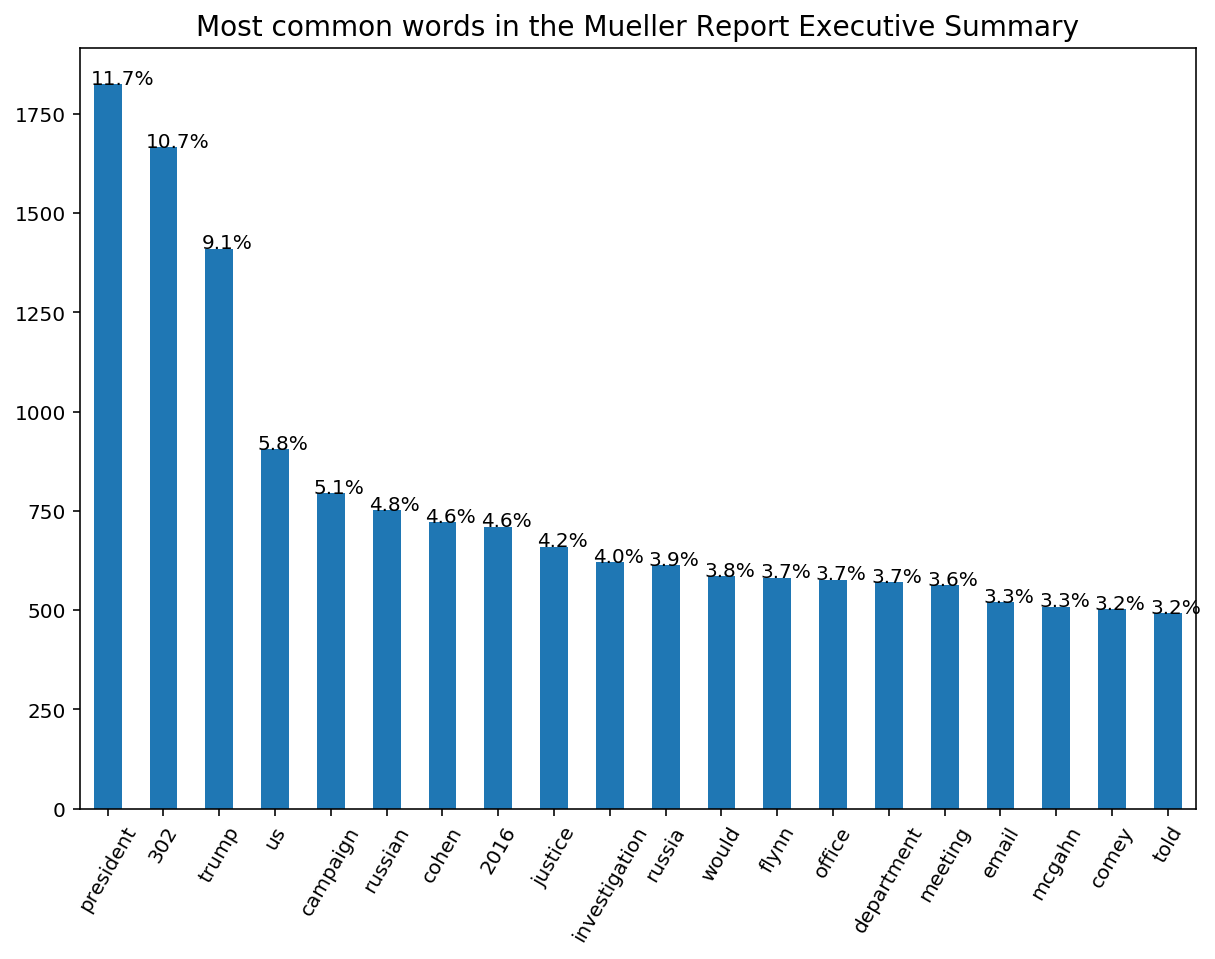

In [12]:
ax = top_20.plot(kind ='bar', figsize = (10,7), rot = 60)

ax.set_alpha(.8)
ax.set_title("Most common words in the Mueller Report Executive Summary", fontsize = 14)

#create a list to collect the plt.patches data
totals = []

#find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())
    
#set individual bar lables using above list
total = sum(totals)

#set individual bar lables using above list
for i in ax.patches:
    #get_x pulls left or right ; get_height pushes up or down
    ax.text(i.get_x()-.06, i.get_height()+.06, \
           str(round((i.get_height()/total)*100,1))+'%', fontsize=10, color = 'black')

In [13]:
def find_ngrams(input_list, n):
    return list(zip(*[input_list[i:] for i in range(n)]))
data['bigrams'] = data['text'].map(lambda x: find_ngrams(x.split(' '), 2))

In [14]:
data['bigrams'][:10]

0            [(us, department), (department, justice)]
1    [(attaraec\\'erlc, predtiet), (predtiet, //), ...
2    [(ma1ertalprn1eeteduader, fed), (fed, r), (r, ...
3                            [(report, investigation)]
4                          [(russian, interferencein)]
5                       [(2016, presidentialelection)]
6                                       [(volume, ii)]
7    [(special, counsel), (counsel, robert), (rober...
8    [(submitted, pursuant), (pursuant, 28), (28, c...
9                                   [(washington, dc)]
Name: bigrams, dtype: object

In [15]:

data = pd.read_csv('Conversations-Grid view.csv')
data[:10]

,Message,Response,Timestamp,User,Response Type,Response Group,Message Type,Response Accuracy,Notes,Negative Sentiment
0,where are the water bottle refill stations on ...,For questions about campus life:,12/7/2019 2:02pm,Juliana Ogarrio,Campus Menu,Campus,Freeform,None,No content on this,NaN
1,🍴 Dining,What question do you have about NYU Dining?,12/7/2019 2:02pm,Juliana Ogarrio,Dining Home,Dining,Button,Full,NaN,NaN
2,📚 Libraries,From the time of its founding in 1831 until 19...,12/7/2019 2:02pm,Juliana Ogarrio,Libraries Welcome,Libraries,Button,Full,NaN,NaN
3,Floor Plan,Lower Level 2\nLeisure Books\nLower Level 1\nL...,12/7/2019 2:03pm,Juliana Ogarrio,Bobst Floor Plan,Libraries,Button,Full,NaN,NaN
4,i need security,"A Social Security Number (SSN) is a unique, 9-...",2/12/2019 1:23pm,Juan Tie,?SSN,Global Services,Freeform,None,NaN,checked
5,security help,"A Social Security Number (SSN) is a unique, 9-...",2/12/2019 1:24pm,Juan Tie,?SSN,Global Services,Freeform,None,NaN,checked
6,public safety,The Department of Public Safety is committed t...,2/12/2019 1:24pm,Juan Tie,Public Safety Welcome,Public Safety,Freeform,Full,NaN,NaN
7,📬 Contact,There are many ways to reach them:,2/12/2019 1:25pm,Juan Tie,PS Contact,Public Safety,Button,Full,NaN,NaN
8,Victim Services,NYU cares about its community and is committed...,2/12/2019 1:25pm,Juan Tie,PS Victim Services,Public Safety,Button,Full,NaN,NaN
9,Safety Tips,Here are some of the need-to-know safety tips ...,2/12/2019 1:26pm,Juan Tie,PS Safety,Public Safety,Button,Full,NaN,NaN


In [16]:
data['Message'] = data['Message'].str.replace(',', '')
data['Message'] = data['Message'].str.replace('.', '')
data['Message'] = data['Message'].str.replace('"', '')
data['Message'] = data['Message'].str.replace(';', '')
data['Message'] = data['Message'].str.replace(':', '')
data['Message'] = data['Message'].str.replace('?', '')
data['Message'] = data['Message'].str.replace('&', '')
data['Message'] = data['Message'].str.replace('!', '')
data[:10]

,Message,Response,Timestamp,User,Response Type,Response Group,Message Type,Response Accuracy,Notes,Negative Sentiment
0,where are the water bottle refill stations on ...,For questions about campus life:,12/7/2019 2:02pm,Juliana Ogarrio,Campus Menu,Campus,Freeform,None,No content on this,NaN
1,🍴 Dining,What question do you have about NYU Dining?,12/7/2019 2:02pm,Juliana Ogarrio,Dining Home,Dining,Button,Full,NaN,NaN
2,📚 Libraries,From the time of its founding in 1831 until 19...,12/7/2019 2:02pm,Juliana Ogarrio,Libraries Welcome,Libraries,Button,Full,NaN,NaN
3,Floor Plan,Lower Level 2\nLeisure Books\nLower Level 1\nL...,12/7/2019 2:03pm,Juliana Ogarrio,Bobst Floor Plan,Libraries,Button,Full,NaN,NaN
4,i need security,"A Social Security Number (SSN) is a unique, 9-...",2/12/2019 1:23pm,Juan Tie,?SSN,Global Services,Freeform,None,NaN,checked
5,security help,"A Social Security Number (SSN) is a unique, 9-...",2/12/2019 1:24pm,Juan Tie,?SSN,Global Services,Freeform,None,NaN,checked
6,public safety,The Department of Public Safety is committed t...,2/12/2019 1:24pm,Juan Tie,Public Safety Welcome,Public Safety,Freeform,Full,NaN,NaN
7,📬 Contact,There are many ways to reach them:,2/12/2019 1:25pm,Juan Tie,PS Contact,Public Safety,Button,Full,NaN,NaN
8,Victim Services,NYU cares about its community and is committed...,2/12/2019 1:25pm,Juan Tie,PS Victim Services,Public Safety,Button,Full,NaN,NaN
9,Safety Tips,Here are some of the need-to-know safety tips ...,2/12/2019 1:26pm,Juan Tie,PS Safety,Public Safety,Button,Full,NaN,NaN


In [17]:
data["word_count"] = data['Message'].apply(lambda x: len(str(x).split(" ")))
data[:10]

,Message,Response,Timestamp,User,Response Type,Response Group,Message Type,Response Accuracy,Notes,Negative Sentiment,word_count
0,where are the water bottle refill stations on ...,For questions about campus life:,12/7/2019 2:02pm,Juliana Ogarrio,Campus Menu,Campus,Freeform,None,No content on this,NaN,9
1,🍴 Dining,What question do you have about NYU Dining?,12/7/2019 2:02pm,Juliana Ogarrio,Dining Home,Dining,Button,Full,NaN,NaN,2
2,📚 Libraries,From the time of its founding in 1831 until 19...,12/7/2019 2:02pm,Juliana Ogarrio,Libraries Welcome,Libraries,Button,Full,NaN,NaN,2
3,Floor Plan,Lower Level 2\nLeisure Books\nLower Level 1\nL...,12/7/2019 2:03pm,Juliana Ogarrio,Bobst Floor Plan,Libraries,Button,Full,NaN,NaN,2
4,i need security,"A Social Security Number (SSN) is a unique, 9-...",2/12/2019 1:23pm,Juan Tie,?SSN,Global Services,Freeform,None,NaN,checked,3
5,security help,"A Social Security Number (SSN) is a unique, 9-...",2/12/2019 1:24pm,Juan Tie,?SSN,Global Services,Freeform,None,NaN,checked,2
6,public safety,The Department of Public Safety is committed t...,2/12/2019 1:24pm,Juan Tie,Public Safety Welcome,Public Safety,Freeform,Full,NaN,NaN,2
7,📬 Contact,There are many ways to reach them:,2/12/2019 1:25pm,Juan Tie,PS Contact,Public Safety,Button,Full,NaN,NaN,2
8,Victim Services,NYU cares about its community and is committed...,2/12/2019 1:25pm,Juan Tie,PS Victim Services,Public Safety,Button,Full,NaN,NaN,2
9,Safety Tips,Here are some of the need-to-know safety tips ...,2/12/2019 1:26pm,Juan Tie,PS Safety,Public Safety,Button,Full,NaN,NaN,2


In [18]:
data['Message'] = data['Message'].apply(stopwords)
data[:10]

,Message,Response,Timestamp,User,Response Type,Response Group,Message Type,Response Accuracy,Notes,Negative Sentiment,word_count
0,water bottle refill stations campus,For questions about campus life:,12/7/2019 2:02pm,Juliana Ogarrio,Campus Menu,Campus,Freeform,None,No content on this,NaN,9
1,🍴 dining,What question do you have about NYU Dining?,12/7/2019 2:02pm,Juliana Ogarrio,Dining Home,Dining,Button,Full,NaN,NaN,2
2,📚 libraries,From the time of its founding in 1831 until 19...,12/7/2019 2:02pm,Juliana Ogarrio,Libraries Welcome,Libraries,Button,Full,NaN,NaN,2
3,floor plan,Lower Level 2\nLeisure Books\nLower Level 1\nL...,12/7/2019 2:03pm,Juliana Ogarrio,Bobst Floor Plan,Libraries,Button,Full,NaN,NaN,2
4,need security,"A Social Security Number (SSN) is a unique, 9-...",2/12/2019 1:23pm,Juan Tie,?SSN,Global Services,Freeform,None,NaN,checked,3
5,security help,"A Social Security Number (SSN) is a unique, 9-...",2/12/2019 1:24pm,Juan Tie,?SSN,Global Services,Freeform,None,NaN,checked,2
6,public safety,The Department of Public Safety is committed t...,2/12/2019 1:24pm,Juan Tie,Public Safety Welcome,Public Safety,Freeform,Full,NaN,NaN,2
7,📬 contact,There are many ways to reach them:,2/12/2019 1:25pm,Juan Tie,PS Contact,Public Safety,Button,Full,NaN,NaN,2
8,victim services,NYU cares about its community and is committed...,2/12/2019 1:25pm,Juan Tie,PS Victim Services,Public Safety,Button,Full,NaN,NaN,2
9,safety tips,Here are some of the need-to-know safety tips ...,2/12/2019 1:26pm,Juan Tie,PS Safety,Public Safety,Button,Full,NaN,NaN,2


In [19]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [20]:
data['Message'] = data['Message'].apply(remove_emoji)

In [21]:
data["new_word_count"] = data['Message'].apply(lambda x: len(str(x).split(" ")))
data[:10]

,Message,Response,Timestamp,User,Response Type,Response Group,Message Type,Response Accuracy,Notes,Negative Sentiment,word_count,new_word_count
0,water bottle refill stations campus,For questions about campus life:,12/7/2019 2:02pm,Juliana Ogarrio,Campus Menu,Campus,Freeform,None,No content on this,NaN,9,5
1,dining,What question do you have about NYU Dining?,12/7/2019 2:02pm,Juliana Ogarrio,Dining Home,Dining,Button,Full,NaN,NaN,2,2
2,libraries,From the time of its founding in 1831 until 19...,12/7/2019 2:02pm,Juliana Ogarrio,Libraries Welcome,Libraries,Button,Full,NaN,NaN,2,2
3,floor plan,Lower Level 2\nLeisure Books\nLower Level 1\nL...,12/7/2019 2:03pm,Juliana Ogarrio,Bobst Floor Plan,Libraries,Button,Full,NaN,NaN,2,2
4,need security,"A Social Security Number (SSN) is a unique, 9-...",2/12/2019 1:23pm,Juan Tie,?SSN,Global Services,Freeform,None,NaN,checked,3,2
5,security help,"A Social Security Number (SSN) is a unique, 9-...",2/12/2019 1:24pm,Juan Tie,?SSN,Global Services,Freeform,None,NaN,checked,2,2
6,public safety,The Department of Public Safety is committed t...,2/12/2019 1:24pm,Juan Tie,Public Safety Welcome,Public Safety,Freeform,Full,NaN,NaN,2,2
7,contact,There are many ways to reach them:,2/12/2019 1:25pm,Juan Tie,PS Contact,Public Safety,Button,Full,NaN,NaN,2,2
8,victim services,NYU cares about its community and is committed...,2/12/2019 1:25pm,Juan Tie,PS Victim Services,Public Safety,Button,Full,NaN,NaN,2,2
9,safety tips,Here are some of the need-to-know safety tips ...,2/12/2019 1:26pm,Juan Tie,PS Safety,Public Safety,Button,Full,NaN,NaN,2,2


In [22]:
top_words = data['Message'].str.split(expand = True).stack().value_counts()
top_20 = top_words[:20]
top_20

nyu                 229
campus               84
school               79
get                  68
life                 61
academics            57
bus                  53
calendar             44
admissions           44
bobst                41
nyc                  41
worst                40
food                 39
best                 39
dining               39
what's               38
hours                37
housing              33
one                  31
self-development     30
dtype: int64

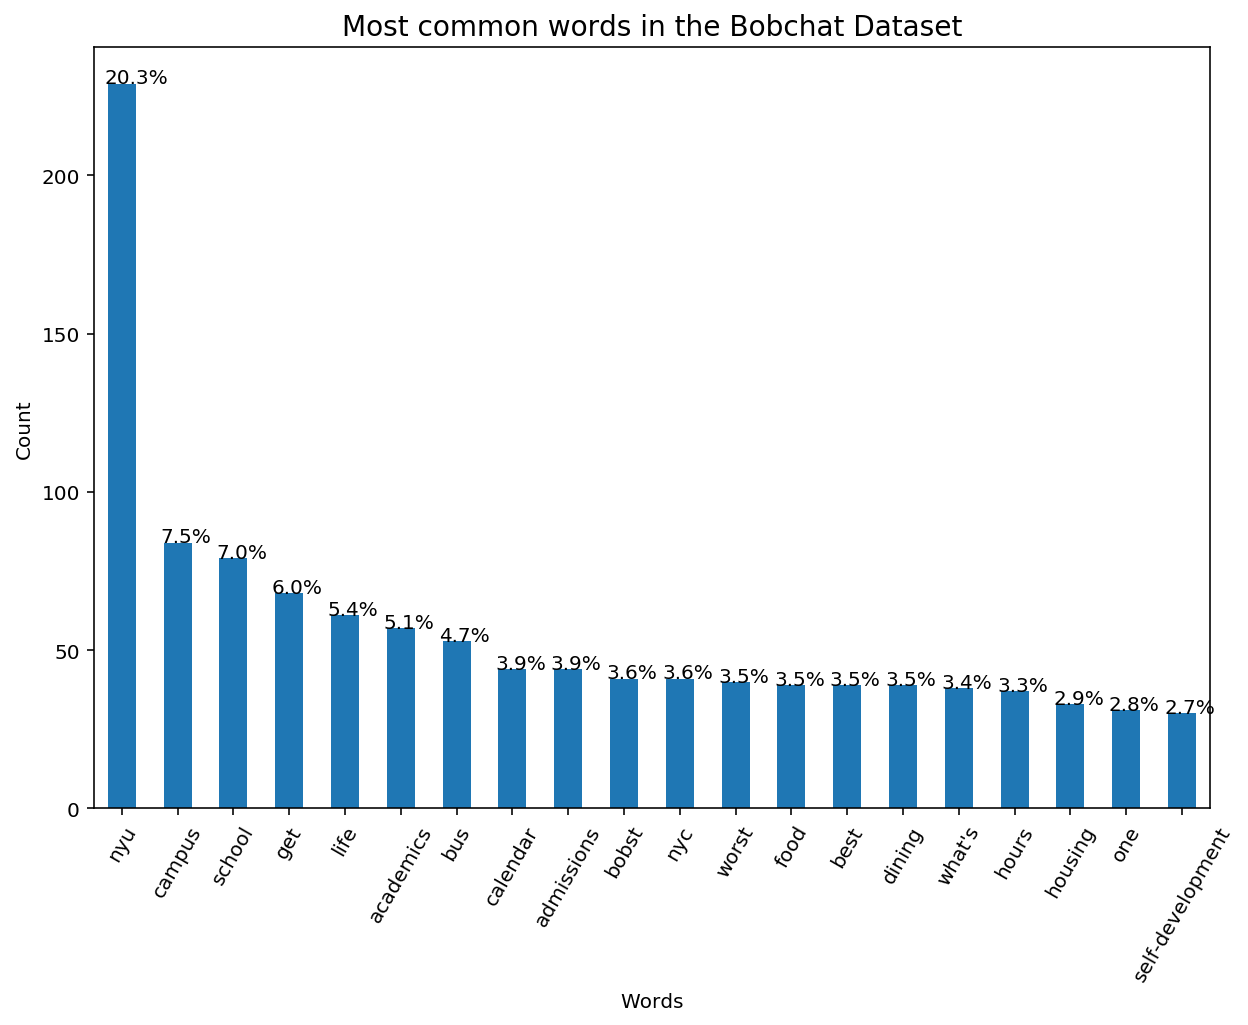

In [26]:
ax = top_20.plot(kind ='bar', figsize = (10,7), rot = 60)

ax.set_alpha(.8)
ax.set_title("Most common words in the Bobchat Dataset", fontsize = 14)
ax.set_ylabel("Count")
ax.set_xlabel("Words")

#create a list to collect the plt.patches data
totals = []

#find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())
    
#set individual bar lables using above list
total = sum(totals)

#set individual bar lables using above list
for i in ax.patches:
    #get_x pulls left or right ; get_height pushes up or down
    ax.text(i.get_x()-.06, i.get_height()+.06, \
           str(round((i.get_height()/total)*100,1))+'%', fontsize=10, color = 'black')